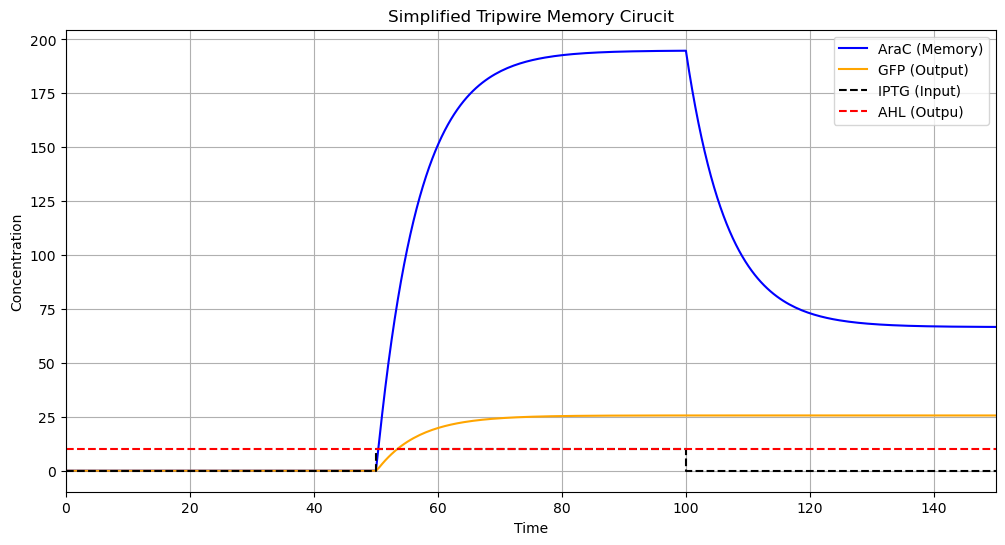

In [20]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

model = te.loada("""
model Tripwire_Circuit
                 
// Species
species IPTG, AHL, AraC, GFP
                 
// Parameters
k_IPTG = 20
k_AraC = 10
k_GFP = 4
k_deg_GFP = 0.15
k_deg_AraC = 0.05
K = 2
n = 2
                 
// AraC production: IPTG triggers + self-loop
J1: -> AraC; k_IPTG*(IPTG^n/(K^n+IPTG^n)) + k_AraC*(AraC^n/(K^n+AraC^n))
                 
// GFP production: AND GATE of AHL + AraC
J2: -> GFP; k_GFP*(AHL^n/(K^n+AHL^n))*(AraC^n/(K^n+AraC^n))
                 
// Degradation
J3: AraC -> ; k_deg_GFP*AraC
J4: GFP -> ; k_deg_GFP*GFP
                 
// Initial Concentration
IPTG = 0
AHL = 10
AraC = 0.01
GFP = 0

end
""")

x1 = model.simulate(0, 50, 100)

model.IPTG = 10
x2 = model.simulate(50, 100, 100)

model.IPTG = 0
x3 = model.simulate(100, 150, 100)

Xcombined = np.vstack((x1, x2, x3))
labels = model.simulate(0, 1, 2).colnames

time = np.concatenate((x1[:,0], x2[:,0], x3[:,0]))
arac = Xcombined[:, labels.index('[AraC]')]
gfp = Xcombined[:, labels.index('[GFP]')]
iptg = [0]*len(x1) + [10]*len(x2) + [0]*len(x3)
ahl = [10]*len(Xcombined)

#Plot
plt.figure(figsize=(12,6))
plt.plot(time, arac, label='AraC (Memory)', color='blue')
plt.plot(time, gfp, label='GFP (Output)', color='orange')
plt.plot(time, iptg, '--', label='IPTG (Input)', color='black')
plt.plot(time, ahl, '--', label='AHL (Outpu)', color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Simplified Tripwire Memory Cirucit")
plt.xlim(0, 150)
plt.grid(True)
plt.show()